# **Lab 1**

In [43]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## **1: A little Statistics**

### **1: Standard Normal Distribution**

**1.** A Standard Normal Nistribution (SND) is a special case of normal distribution, with mean being 0 and variance being 1. The probability density function (PDF) of the Standard Normal Distribution follows the equation $$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2} $$ If a sample space (likelihood that an event happens) is described by SND, We can calculate the probability that the event has a value equal to or less than a certain value (We can denote this value by z, for now) by calculating the Cumulative Density Function (CDF) of SND, given by:$$F(z) =  \int_{-\infty}^{z} f(x) \,dx$$

The integral will be hard to solve by hand. Luckily, we are provided with a table named Z-table, which includes the corresponding value of $F(z)$ given a value of z. We can also use commands to calculate $F(x)$.

For example, if z = 1, $F(z)$ can be calculated by:

In [69]:
F = stats.norm.cdf(1, loc=0, scale=1)
F

0.8413447460685429

Referring back to the Z-table, the value of $F(1)$ given in the table is 0.8413: The results of two methods match!

Let's try z = 0.55.

In [70]:
F = stats.norm.cdf(0.55, loc=0, scale=1)
F

0.7088403132116536

Z-table indicates a value of 0.7088 when z = 0.55: The results match again!

We can also do the inverse: Given the value of $F(x)$, we can calculate its corresponding z-value. Let's try a few examples.

From the lecture, we know: $$ X\sigma = \int_{X\sigma }^{\infty} f(x) \,dx  = 1 - F(X\sigma)$$ Also, $5\sigma = 2.87 * 10^{-7}$, therefore $F(5\sigma) = 1 - 2.87 * 10^{-7}$

In [71]:
Fx = 1 - 2.87 * 10 ** (-7)

In [72]:
sig = stats.norm.ppf(Fx, loc=0, scale=1)
sig

4.9997657768508095

The returned value of $5\sigma$ is 4.9998: Very close to the real value of $5\sigma$ ($\sigma$ = 1 in this case) . We can say the answer matches! The tiny difference is very likely attributed to the decimal places.

Let's try one more: $3\sigma \approx 1.35 * 10^{-3}$, and $F(3\sigma) = 1 - 1.35 * 10^{-3}$

In [73]:
Fx = 1 - 1.35 * 10**(-3)

In [74]:
sig = stats.norm.ppf(Fx, loc=0, scale=1)
sig

2.9999769927034015

Very close to $3\sigma$!

### **2: Chi-Squared distribution**

Now Let us look at another continuous distribution: Chi-Squared distribution. If $X_n$ is standard normal variables, then the random variable of Chi-Squared is given by $\sum X^{2}_{i}$. Let's draw 100k points from a Chi-Squared distribution with a degree of freedom of 3. (The degrees of freedom of the distribution is equal to the number of standard normal deviates being summed. A degree of freedom of 3 means the Chi-Squared random variable is $\sum_{i=1}^{3} X^{2}_{i}$ The mean of Chi-Squared distribution also equals to the degree of freedom).

In [75]:
plt.rcParams["figure.figsize"] = (15,10)

In [76]:
d = stats.chi2.rvs(df = 3, size = 100000)

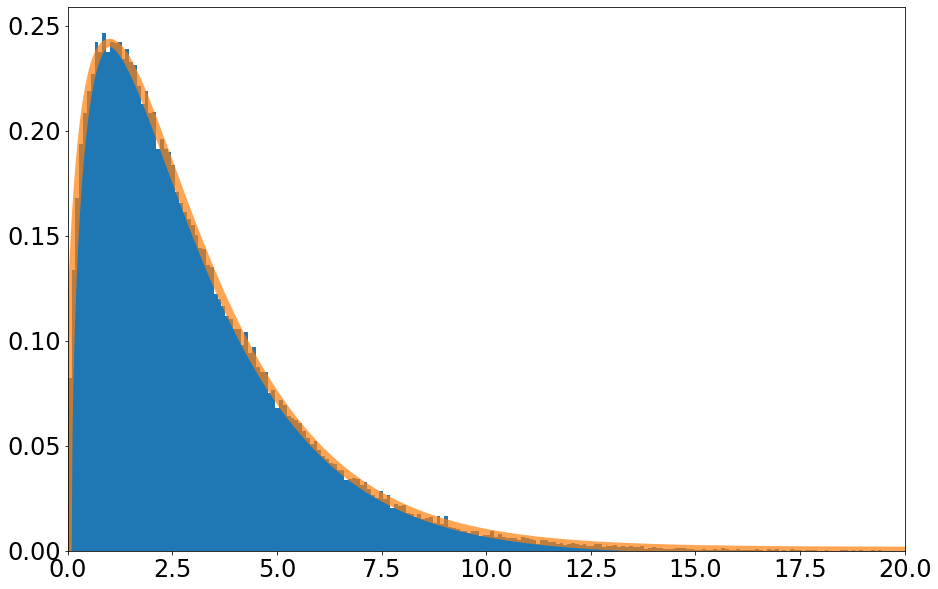

In [77]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,300, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(0,20,1000)
ax.plot(x,stats.chi2.pdf(x, df = 3),linewidth = 8,alpha = 0.7)
plt.show()

What does the logarithmic of our sample points look like?

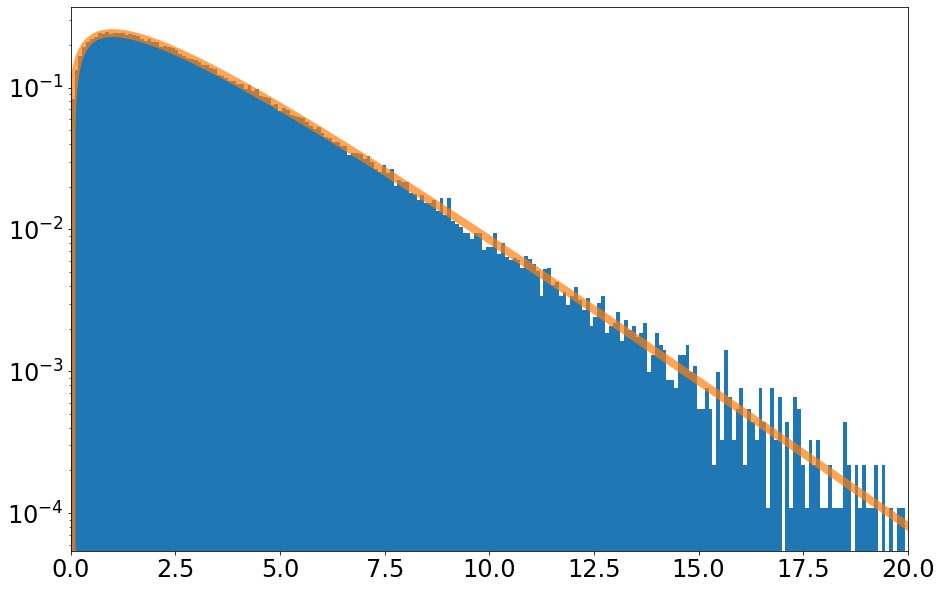

In [78]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,300, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
plt.yscale('log')
x = np.linspace(0,20,1000)
ax.plot(x,stats.chi2.pdf(x, df = 3),linewidth = 8,alpha = 0.7)
plt.show()

The greater the degrees of freedom, the more the chi square distribution looks like a normal distribution. For example, if we draw a Chi-square distribution with a degree of freedom being 9999:

In [79]:
d = stats.chi2.rvs(df = 9999, size = 100000)
d

array([ 9923.25061268, 10083.01741669, 10007.25538359, ...,
       10041.24045404, 10303.25885033, 10096.27966274])

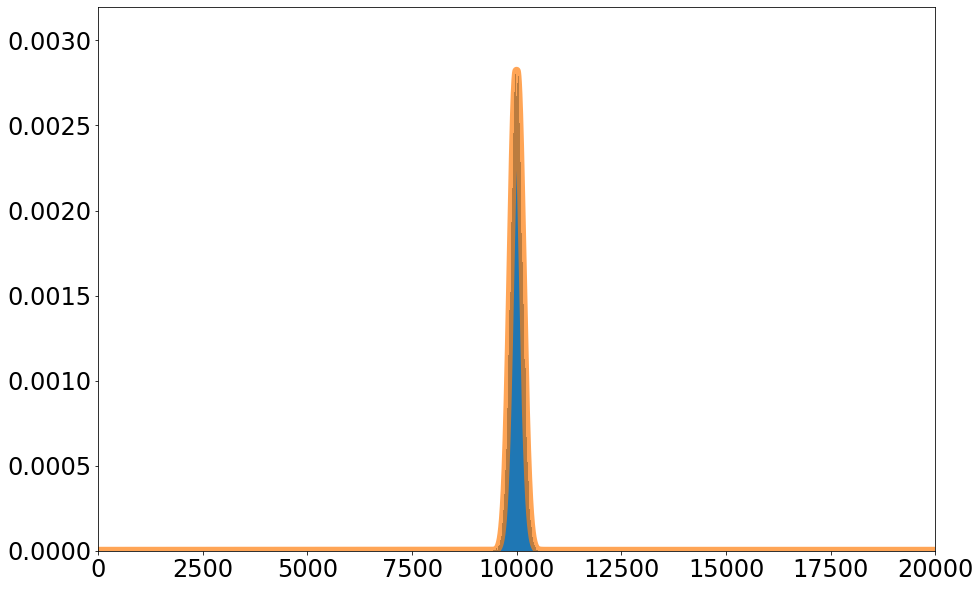

In [80]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,300, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20000])
x = np.linspace(0,20000,100000)
ax.plot(x,stats.chi2.pdf(x, df = 9999),linewidth = 8,alpha = 0.7)
plt.show()

The plot looks exactly the same as a distribution of a normal distribution with a mean of 9999. We know the log plot of normal distribution looks like a parabola, so what does the log of Chi-Squared distribution with a large degreee of freedom look like?

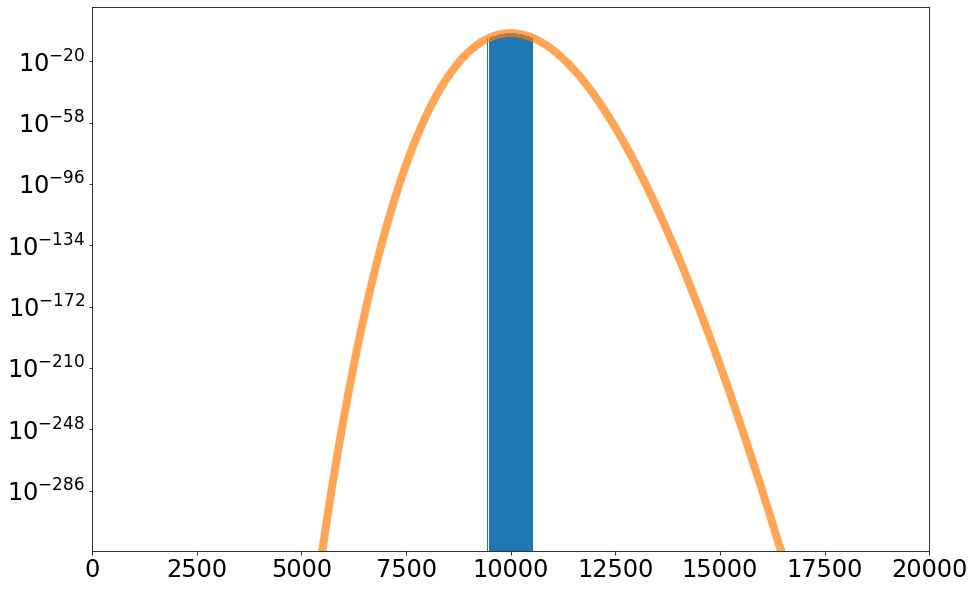

In [81]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,300, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20000])
plt.yscale('log')
x = np.linspace(0,20000,100000)
ax.plot(x,stats.chi2.pdf(x, df = 9999),linewidth = 8,alpha = 0.7)
plt.show()

The real distribution drew in orange line looks indeed like a parabola, which proves Chi-Square distribution with large degree of freedom behave like a normal distribution. However, we can tell the sample points(histogram denoted in blue) all gathered around the center, because the probability of sample points having a value corresponding to the tails of the plot is way too small campared to the center($10^{-20}$ vs.$10^{-286}$ as shown on the y-axis).

### **1-3: Determine Sigma**

Now imagine the scenario that the signal-free data we collected follows a Chi-Squared distribution (with degree of freedom being 3). And the value we measured x = 10. **What's the probability that the data produces a signal that is equally or more signal-like than the value we measured?**

The probability can be calculated by taking integral of the distribution, from the value we observed (x = 10) to infinity.

$$ P = \int_{10}^{\infty} f(x) \,dx  = 1 - F(10)$$

The value of $F(10)$ can be obtained by using **cdf()** command.

In [82]:
P = 1 - stats.chi2.cdf(10, df = 3)
P

0.0185661354630432

Now we have the probability. Next step is converting this value to the equivalent sigma value. We now need to use **ppf()** command on SND

In [83]:
sigma = stats.norm.ppf(1 - P, loc = 0, scale = 1)
sigma

2.0843067810989737

So the equivalent sigma value is 2.0843


(Notice we use 1-P instead of only P as parameter for ppf() function. Because sigma is defined as the integral taken from the value given to inifinity, and cdf() calculates the integral from negative inifinity to the given value. If we use P as paramter, we get the same value for sigma, but negative)

## **2: Non-continuous distributions - Binomial**

In this section, we will be looking into a discrete distributino: Binomial distribution. It describes the probability of k number of successes of events, each with a successful possibility p, in a sequence of n independent events. Mathematically: $$ P(k) = \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

Now let's draw a few plots of Binomial distributions. First we try a Binomial distribution with n = 60 and p = 0.4.

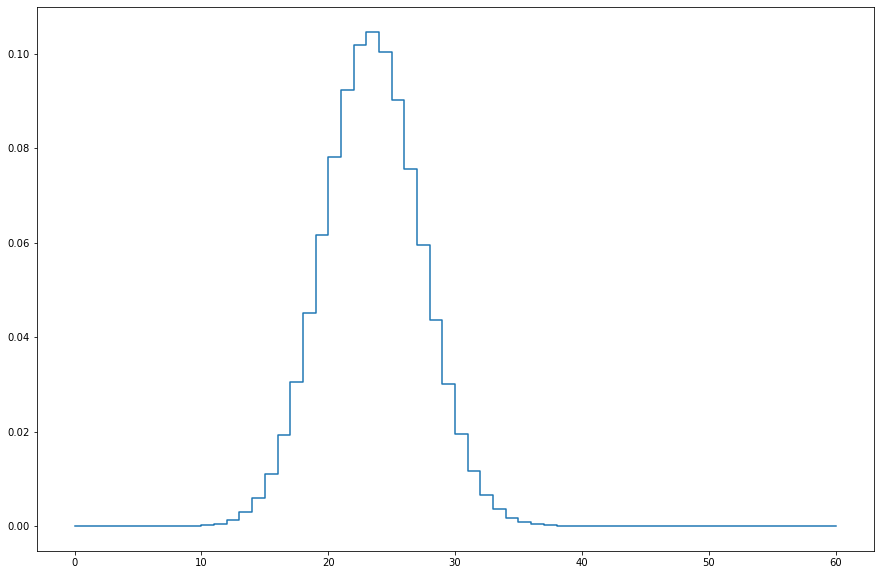

In [84]:
n = 60
p = 0.4
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.step(r_values, dist)
plt.show()

The plot is skewd right, with its peak at x between 20 and 30.

Let's try n = 100, and p = 0.3

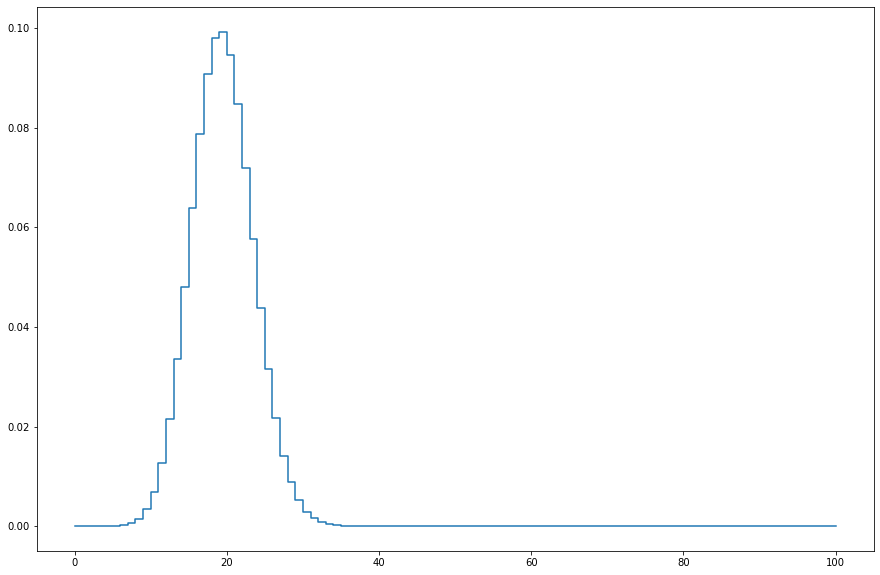

In [85]:
n = 100
p = 0.2
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.step(r_values, dist)
plt.show()

Now the peak of the plot is located at x = 20, and the peak is narrower than last graph.

Then, we do n 80 and p = 0.9:

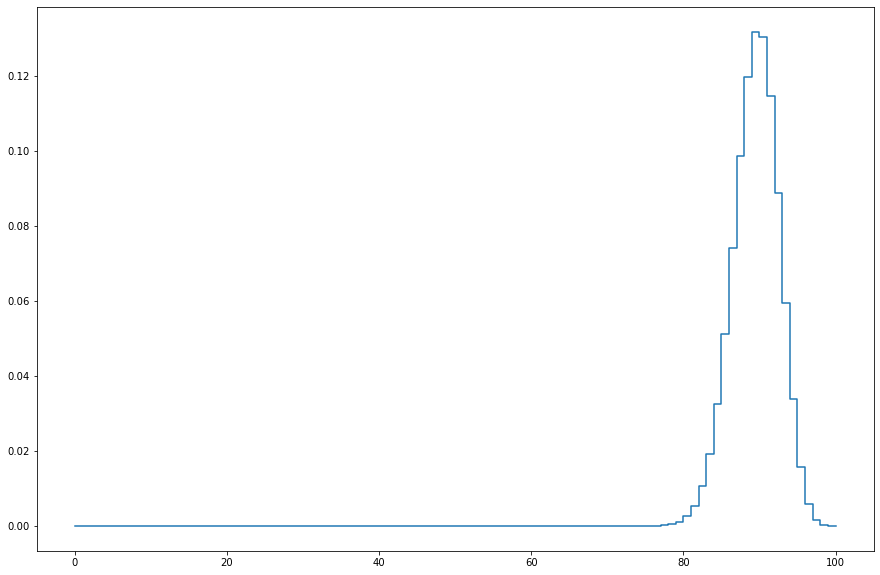

In [86]:
n = 100
p = 0.9
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.step(r_values, dist)
plt.show()

This time, the plot is skewed right, with its peak at somewhere between 80 and 100. It is also narrower than the first plot.

Lastly, we try n = 40, and p = 0.5

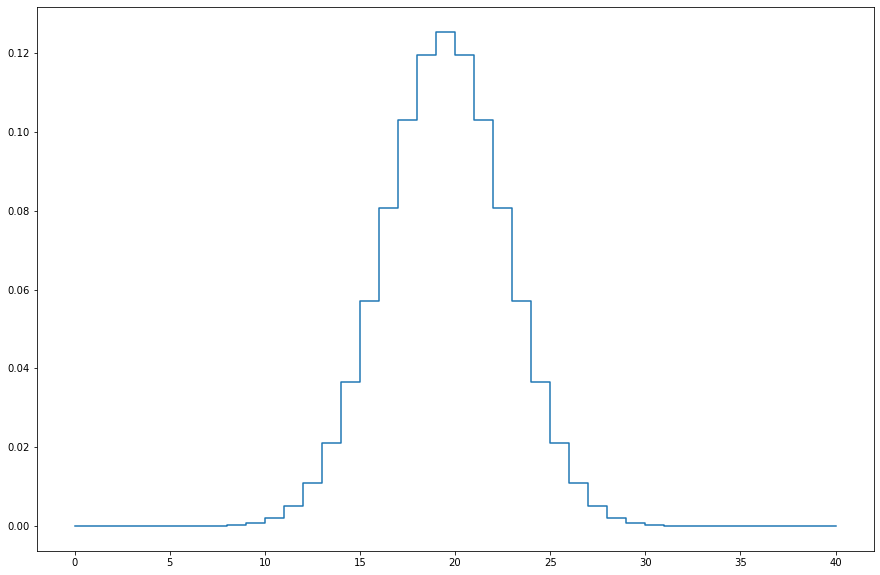

In [87]:
n = 40
p = 0.5
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.step(r_values, dist)
plt.show()

The graph is exactly symmteric along x = 20! And its peak is also wider.

From above plots, we can deduce that the peak of binomial distribution graph will be at x = p * n. And as p being furthur away from 0.5, the value of the distribution will change more rapidly

 Now let's repeat what we did in 1-3, but this time on non-continuous binomial distribution: If the signal-free data we collected follows a binomial distribution (with p = 0.4 and n = 60, our first plot). And the value we measured x = 40. **What's the probability that the data produces a signal that is equally or more signal-like than the value we measured?**

This time, the probability can be calculated by taking the sum of all the probability mass function(PMF), from the value we observed (x = 40) to the maximum value(x = n = 60). Written in Math: $$P = \sum_{i = 40}^{60} P_x(i)$$

This can be caculated by $P = 1 - F_{x}(40)$. Again, $F_x$ is the CDF of the probability function.

In [88]:
P = 1 - stats.binom.cdf(39, 60, 0.4)
P

2.7047676241620522e-05

Then we calculate the corresponding sigma value using ppf() command as in 1-3

In [89]:
sigma = stats.norm.ppf(1 - P, loc = 0, scale = 1)
sigma

4.037189582805819

The sigma value is approximately 4.0372 for observed value x = 40.

What if we set our hypothetical measurement value to be around the peak ( x = 0.4 * 60 = 24)? What could the equivalent sigma value be? We will try both x = 25 and x = 24, since it is discrete.

In [90]:
P = 1 - stats.binom.cdf(23, 60, 0.4)
P

0.5488936106156018

In [91]:
sigma = stats.norm.ppf(1 - P, loc = 0, scale = 1)
sigma

-0.12286654412563869

In [92]:
P = 1 - stats.binom.cdf(24, 60, 0.4)
P

0.4442244272502647

In [93]:
sigma = stats.norm.ppf(1 - P, loc = 0, scale = 1)
sigma

0.14026723061552324

The sigma for x = 24 is -0.1229, and is 0.1403 for x = 25. We can say if the observed value is at the peak of our binomial distribution, the sigma value will be close to 0.

Although discrete distributions are discrete, the parameters of the distribution are not necessarily discrete. It makes sense. A simple example is the mean of a list of integers. If we have 1,3,5,7,8 as our list of integers, the mean turns out to not be an integer: 4.8. The same reasoning applies to our binomial discrete distribution.